# Tarea 5 - Regresión Logística - Bryan Rodríguez 

In [2]:
#Cargar las librerias necesarias
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
#Creación y lectura de datos 
Datos = pd.read_csv('./Titanic-Dataset.csv')

Datos.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

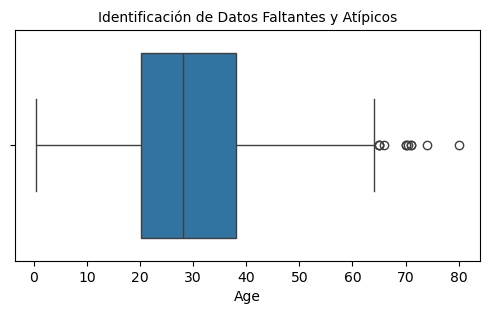

In [4]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [5]:
#Revisión de datos faltantes
print("Cantidad de Registros con cero en Clase: ",Datos['Pclass'].isin([0]).sum())
print("Cantidad de Registros con cero en Edad: ",Datos['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Embarcamiento: ",Datos['Embarked'].isin([0]).sum())

Cantidad de Registros con cero en Clase:  0
Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Embarcamiento:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos - Embarcamiento')

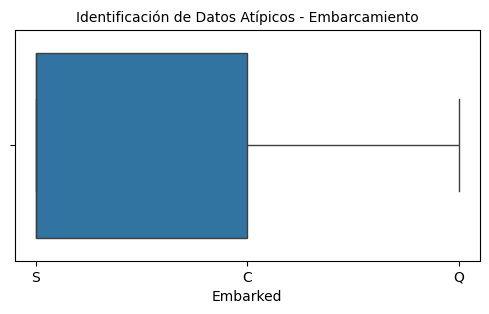

In [6]:
#Identificación de Datos Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Embarked'])
plt.title('Identificación de Datos Atípicos - Embarcamiento', fontsize=10 )

In [7]:
#Variables importantes identificadas:
#Conteo de Datos Atípicos - Edad
nivel_minimo_Age=1
nivel_maximo_Age=80 
Total_Atp_Age=((Datos['Age']<nivel_minimo_Age)|(Datos['Age']>nivel_maximo_Age)).sum()
print("El total de datos atípicos en Age es: {}".format(Total_Atp_Age))

El total de datos atípicos en Age es: 7


In [8]:
#Conteo de Datos Atípicos - Clase 
nivel_minimo_op=0 
nivel_maximo_op=3 
Total_Atp_op=((Datos['Pclass']<nivel_minimo_op)|(Datos['Pclass']>nivel_maximo_op)).sum()
print("El total de datos atípicos en Pclass es: {}".format(Total_Atp_op))

El total de datos atípicos en Pclass es: 0


In [44]:
# Filtra Datos Atípicos - Edad
Datos=Datos[(Datos['Age']<nivel_maximo_Age)&(Datos['Age']>nivel_minimo_Age)]

# Validar si se removieron los datos atípicos
Total_Atp_Age=((Datos['Age']<nivel_minimo_Age)|(Datos['Age']>nivel_maximo_Age)).sum()
print("El total de datos atípicos - Age es {}".format(Total_Atp_Age))

El total de datos atípicos - Age es 0


In [46]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

Datos['Age']=Datos['Age'].replace(0,Datos['Age'].mean())
Datos['Pclass']=Datos['Pclass'].replace(0,Datos['Pclass'].mean())

In [12]:
#Revisión del tipo de datos y datos faltantes
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  699 non-null    int64  
 1   Survived     699 non-null    int64  
 2   Pclass       699 non-null    int64  
 3   Name         699 non-null    object 
 4   Sex          699 non-null    object 
 5   Age          699 non-null    float64
 6   SibSp        699 non-null    int64  
 7   Parch        699 non-null    int64  
 8   Ticket       699 non-null    object 
 9   Fare         699 non-null    float64
 10  Cabin        182 non-null    object 
 11  Embarked     697 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 71.0+ KB


In [13]:
# Total de personas que sobrevivieron (1)
Datos['Survived'].value_counts()

Survived
0    422
1    277
Name: count, dtype: int64

In [14]:
Datos[['Survived']].head(10)

,Survived
0,0
1,1
2,1
3,1
4,0
6,0
7,0
8,1
9,1
10,1


In [15]:
## Eliminamos la columna 'Name'
Datos = Datos.drop('Name', axis=1)
## Eliminamos la columna 'Cabin'
Datos = Datos.drop('Cabin', axis=1)
Datos = Datos.drop('Fare', axis=1)
Datos = Datos.drop('Embarked', axis=1)
Datos = Datos.drop('Ticket', axis=1)
## Imprimimos el DataFrame después de eliminar la columna
print(Datos)

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch
0              1         0       3    male  22.0      1      0
1              2         1       1  female  38.0      1      0
2              3         1       3  female  26.0      0      0
3              4         1       1  female  35.0      1      0
4              5         0       3    male  35.0      0      0
..           ...       ...     ...     ...   ...    ...    ...
885          886         0       3  female  39.0      0      5
886          887         0       2    male  27.0      0      0
887          888         1       1  female  19.0      0      0
889          890         1       1    male  26.0      0      0
890          891         0       3    male  32.0      0      0

[699 rows x 7 columns]


In [48]:
## Creamos un diccionario para convertir géneros a números
genero_map = {'male': 1, 'female': 2}

## Utilizamos map() para convertir géneros a números
Datos['Sex'] = Datos['Sex'].map(genero_map)

print(Datos)

     PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch
0              1         0       3  NaN  22.0      1      0
1              2         1       1  NaN  38.0      1      0
2              3         1       3  NaN  26.0      0      0
3              4         1       1  NaN  35.0      1      0
4              5         0       3  NaN  35.0      0      0
..           ...       ...     ...  ...   ...    ...    ...
885          886         0       3  NaN  39.0      0      5
886          887         0       2  NaN  27.0      0      0
887          888         1       1  NaN  19.0      0      0
889          890         1       1  NaN  26.0      0      0
890          891         0       3  NaN  32.0      0      0

[699 rows x 7 columns]


In [17]:
# Porcentaje de datos para entrenamiento (train) = 80% , y para prueba (test) = 20%

# Variables X y Y para almacenar la información del entrenamiento:
X = Datos.drop('Survived',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = Datos['Survived'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

print (X_train)

     PassengerId  Pclass  Sex   Age  SibSp  Parch
491          492       3    1  21.0      0      0
823          824       3    2  27.0      0      1
881          882       3    1  33.0      0      0
213          214       2    1  30.0      0      0
641          642       1    2  24.0      0      0
..           ...     ...  ...   ...    ...    ...
725          726       3    1  20.0      0      0
62            63       1    1  45.0      1      0
777          778       3    2   5.0      0      0
721          722       3    1  17.0      1      0
265          266       2    1  36.0      0      0

[524 rows x 6 columns]


In [18]:
print (Y_train)

491    0
823    1
881    0
213    0
641    1
      ..
725    0
62     0
777    1
721    0
265    0
Name: Survived, Length: 524, dtype: int64


In [19]:
# Construir el modelo de regresión logística 
modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación
# 
print (Prediccion)

[1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1
 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1
 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0
 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1]


In [20]:
# Desempeño del modelo de regresión
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       106
           1       0.84      0.83      0.83        69

    accuracy                           0.87       175
   macro avg       0.86      0.86      0.86       175
weighted avg       0.87      0.87      0.87       175



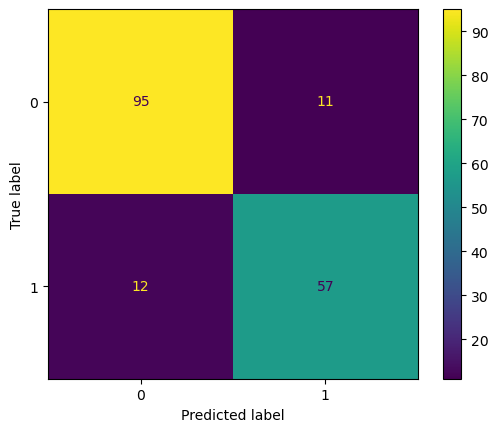

In [21]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

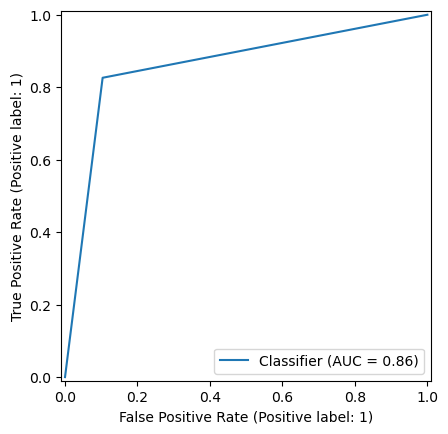

In [22]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()